relative inclination =  39.99999999999999
P_2/P_1 =  33.551693018268345
sin(i3)/sin(i) - beta =  -5.421010862427522e-20


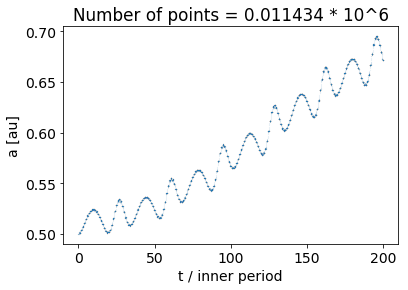

number of integration steps =  11434
end simulation time in innerP's =  200.00007023802885


In [42]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

#Define the rebound simulation
sim1 = rebound.Simulation()

#Define the masses and mass ratios of the system
m1 = 1
m2 = 1/1047
m3 = 2
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2

#Define the initial orbit elements of the inner binary
inner_a = 1
inner_e = 0.5
inner_w = 0*np.pi/180
inner_Omega = 0
inner_f = 90

#Define the initial orbit elements of the outer binary
outer_A = 15
outer_E = 0.1
outer_w3 = 0*np.pi/180
outer_Omega3 = np.pi
outer_f = 90

#Define the initial relative inclination
z = 40*np.pi/180 

#Calculate the angular momenta of the inner and outer binary
Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
beta = Jb/J3
#Determine the initial inclinations of the inner and outer binary to align J with z
outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)
inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

#Define the rebound simulation by adding the three masses with corresponding orbit elements
sim1.add(m=m1)                
sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
         Omega=inner_Omega,f = inner_f*np.pi/180)
sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
         Omega=outer_Omega3,f = outer_f*np.pi/180)
sim1.move_to_com()

#Print important quantities as a check
Pratio = sim1.particles[2].P/sim1.particles[1].P
print("relative inclination = ",(inner_i+outer_i3)*180/np.pi)
print("P_2/P_1 = ",Pratio)
print("sin(i3)/sin(i) - beta = ",np.sin(outer_i3)/np.sin(inner_i)-beta)


#Define the period of the inner orbit in rebound's system of units
innerP = sim1.particles[1].P

#Set the integration time,
tf = 200*sim1.particles[1].P

#Define empty lists for the data to fill
efcn1,zfcn1,afcn1,tlist = [],[],[],[]

#Integration loop
while sim1.t < tf:
    #Append the current the values of orbit elemenths to the corresponding list
    afcn1.append(sim1.particles[1].a)
    zfcn1.append(sim1.particles[1].inc + sim1.particles[2].inc)
    efcn1.append(sim1.particles[1].e)
    tlist.append(sim1.t)   
    #Integrate the system forward by x steps
    sim1.steps(1)
    
#Scatter plot the a and t data
plt.scatter(np.array(tlist)/innerP,efcn1,s=0.001)
plt.title("Number of points = {} * 10^6".format(len(tlist)/10**6))
plt.xlabel('t / inner period')
plt.ylabel('a [au]')
plt.show()


print("number of integration steps = ",sim1.steps_done)
print("end simulation time in innerP's = ",sim1.t/innerP)

959


<Figure size 576x432 with 0 Axes>

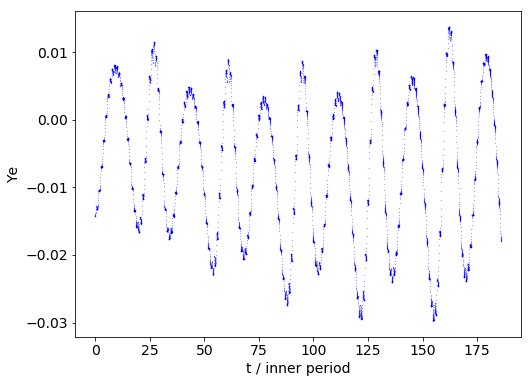

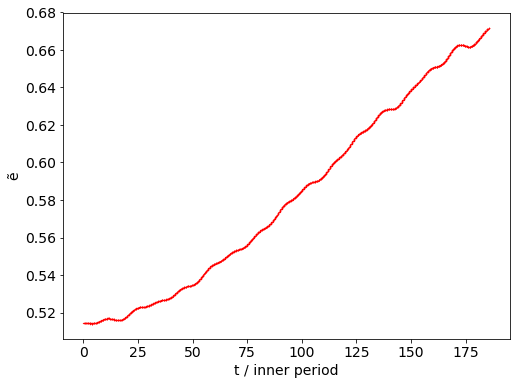

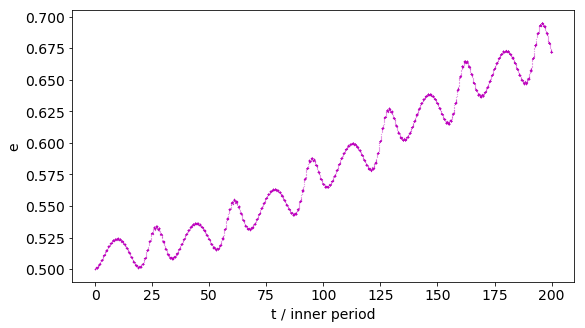

In [43]:
N = int(0.5*int(len(efcn1)/((tlist[-1])/innerP/Pratio)))
print(N)
tlist=np.array(tlist)

aved_e = np.convolve(efcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)

Ye=np.zeros(len(aved_e))
for i in range(len(aved_e)):
    Ye[i]=efcn1[i]-aved_e[i]

plt.rcParams.update({'font.size': 14})    
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(Ye)]/innerP,Ye,s=0.02,c='b')
plt.xlabel('t / inner period')
plt.ylabel('Ye')
plt.show()

plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_e)]/innerP,aved_e,s=0.02,c='r')
plt.xlabel('t / inner period')
plt.ylabel('ẽ')
plt.show()

plt.figure(figsize=(9, 5))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(efcn1)]/innerP,efcn1,s=0.02,c='m')
plt.xlabel('t / inner period')
plt.ylabel('e')
plt.show()

In [86]:
tlist=tlist/innerP
tlist.astype('float32').tofile('npt.dat')
aved_z.astype('float32').tofile('npavz.dat')
aved_a.astype('float32').tofile('npava.dat')
aved_e.astype('float32').tofile('npave.dat')

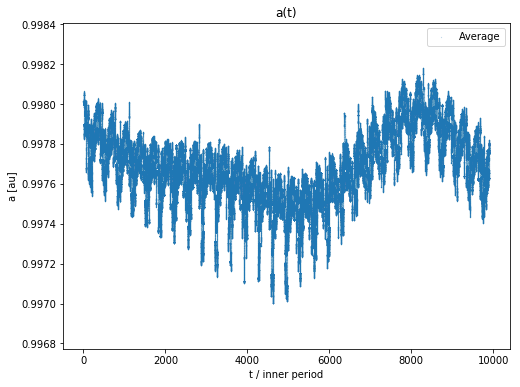